In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import *
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

**Data Reading**

In [3]:
data = pd.read_csv('/kaggle/input/diamondprices/DiamondsPrices.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**EDA**

In [4]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


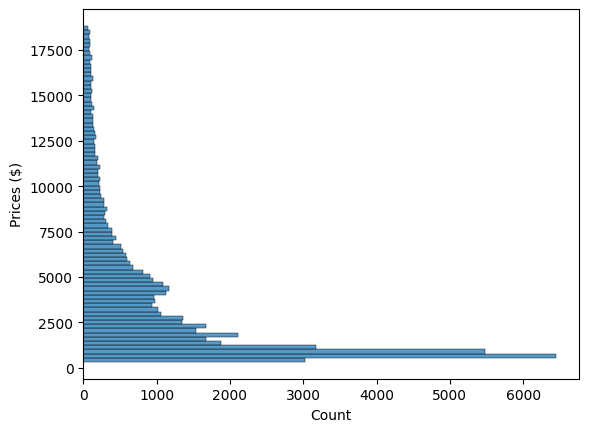

In [6]:
sns.histplot(data=data, y="price")
plt.ylabel("Prices ($)")
plt.show()

In [7]:
fig = px.pie(data, values='price', names='cut', title='Prices of The cuts')
fig.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/

<Axes: xlabel='carat', ylabel='price'>

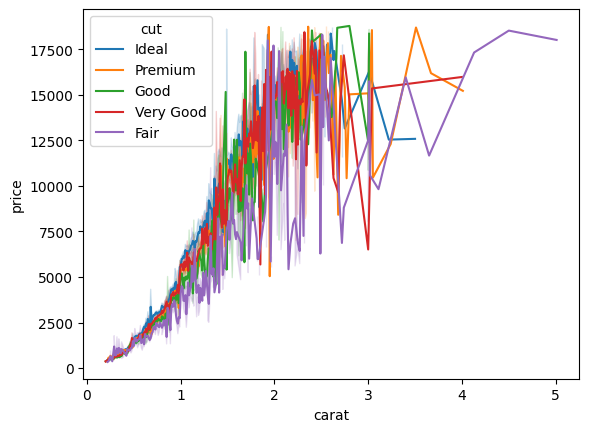

In [8]:
sns.lineplot(data=data, x="carat", y="price", hue="cut")


In [9]:
data.min()

carat       0.2
cut        Fair
color         D
clarity      I1
depth      43.0
table      43.0
price       326
x           0.0
y           0.0
z           0.0
dtype: object

In [10]:
data.max()

carat           5.01
cut        Very Good
color              J
clarity         VVS2
depth           79.0
table           95.0
price          18823
x              10.74
y               58.9
z               31.8
dtype: object

In [11]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**data preprocessing**

In [12]:
ct = make_column_transformer(
    (MinMaxScaler(), ['carat','depth','table','x','y','z']),
    (OneHotEncoder(handle_unknown='ignore'), ['cut', 'color', 'clarity'])
)
#Create X & y values
X = data.drop('price', axis = 1)
y = data['price']

#Splitting into Train  and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 42)

# Fit & Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [13]:
X_train, X_test

(array([[0.37629938, 0.41944444, 0.40384615, ..., 0.        , 0.        ,
         0.        ],
        [0.16839917, 0.47222222, 0.32692308, ..., 0.        , 0.        ,
         0.        ],
        [0.18711019, 0.54166667, 0.28846154, ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.02702703, 0.48055556, 0.28846154, ..., 0.        , 0.        ,
         0.        ],
        [0.14553015, 0.55      , 0.30769231, ..., 0.        , 0.        ,
         0.        ],
        [0.1954262 , 0.48333333, 0.28846154, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.00831601, 0.53055556, 0.25      , ..., 0.        , 1.        ,
         0.        ],
        [0.07900208, 0.47222222, 0.26923077, ..., 0.        , 0.        ,
         1.        ],
        [0.04158004, 0.53055556, 0.23076923, ..., 0.        , 0.        ,
         1.        ],
        ...,
        [0.02286902, 0.41666667, 0.36538462, ..., 0.        , 1.        ,
         0.        ],
        [0.2

In [16]:
# Set a random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300),    
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),

    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.mae,
              metrics = ['mae'])
early_stop = EarlyStopping(
    patience = 10,
    monitor = 'loss',
    restore_best_weights = True
)
#3. Fit the model
history = model.fit(X_train, y_train, callbacks=[early_stop],epochs = 200)

Epoch 1/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1760.9919 - mae: 1760.9919
Epoch 2/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 834.2980 - mae: 834.2980
Epoch 3/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 787.2471 - mae: 787.2471
Epoch 4/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 752.9466 - mae: 752.9466
Epoch 5/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 722.9255 - mae: 722.9255
Epoch 6/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 705.1680 - mae: 705.1680
Epoch 7/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 692.6411 - mae: 692.6411
Epoch 8/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 690.7882 - mae: 690.7882
Epoch 9/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 685.9190 - mae: 685.9190
Epoch 10/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 683.3656 - mae: 683.3656
Epoch 11/200
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 681.6730 - mae: 681.6730
Epoch 12/200
1349/1349 ━━━━━

In [17]:
model.evaluate(X_test, y_test)

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 648.5654 - mae: 648.5654


[646.0156860351562, 646.0156860351562]

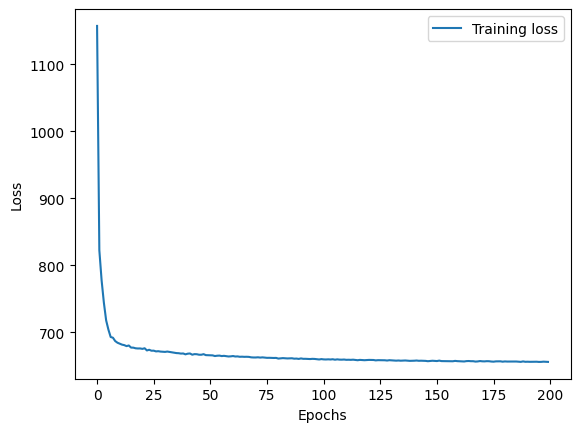

In [18]:
plt.plot(history.history['loss'], label ='Training loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()
plt.show()